In [1]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Loading Dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv.xls')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Dataset Information

In [3]:
df.shape

(5110, 12)

In [4]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [7]:
#Alternatively:
df[['gender', 'id']].groupby('gender').count()

,id
gender,
Female,2994
Male,2115
Other,1


In [8]:
# "Gender" column has 3 categories. Category "Other" has 1 id - it can be omitted
df = df[df.gender != 'Other']

In [9]:
df.gender.value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [10]:
df.work_type.value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [11]:
df.Residence_type.value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [12]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [13]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
# Column "ID" is the ID of patients, and do not give us useful information
df = df.drop('id', axis = 1)

In [15]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
# Checking for null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [17]:
mean_bmi_with_stroke = df[df.stroke == 1]['bmi'].mean()
mean_bmi_with_stroke

30.47129186602871

In [18]:
mean_bmi_without_stroke = df[df.stroke == 0]['bmi'].mean()
mean_bmi_without_stroke 

28.824430729942552

In [19]:
#Replace the null values of bmi where stroke is equal 1
df.loc[df.stroke == 1, 'bmi'] = df.loc[df.stroke == 1, 'bmi'].fillna(mean_bmi_with_stroke).round(2)

In [20]:
#Replace the null values of bmi where stroke is equal 0
df.loc[df.stroke == 0, 'bmi'] = df.loc[df.stroke == 0, 'bmi'].fillna(mean_bmi_without_stroke).round(2)

In [21]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [22]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.47,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


In [23]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [24]:
df.ever_married.value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [25]:
df.gender.value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [26]:
df.work_type.value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [27]:
df.Residence_type.value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [28]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [29]:
df.stroke.value_counts()

0    4860
1     249
Name: stroke, dtype: int64

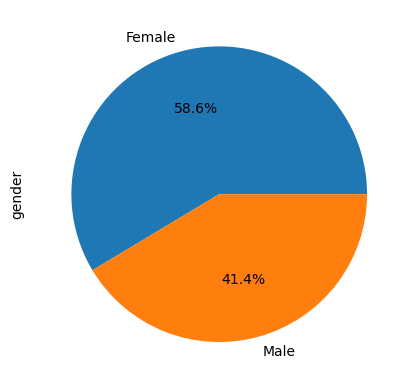

In [30]:
# Visualition of gender. Overall
df['gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

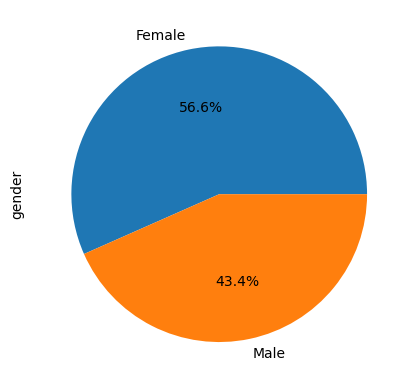

In [31]:
# Visualition of gender with stroke
stroke_df = df[df['stroke'] == 1]
stroke_df['gender'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

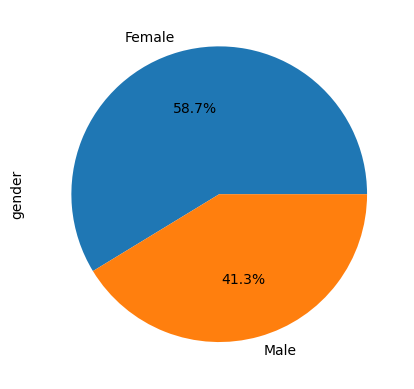

In [32]:
# Visualition of gender without stroke
No_stroke_df = df[df['stroke'] == 0]
No_stroke_df['gender'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of age')]

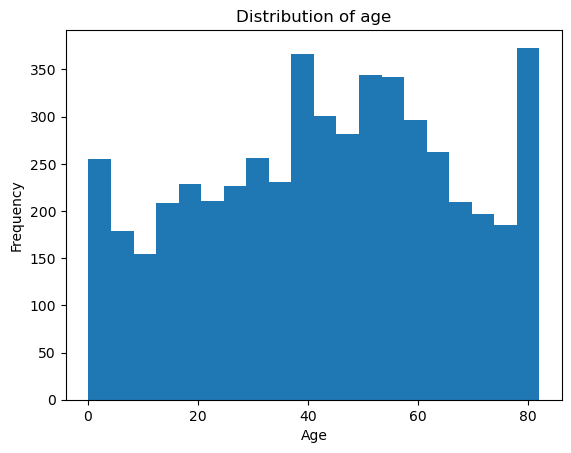

In [33]:
# Visualition of age. Overall
ax = plt.axes()
ax.hist(df.age, bins = 20)
ax.set(xlabel = 'Age', ylabel = 'Frequency', title = 'Distribution of age')

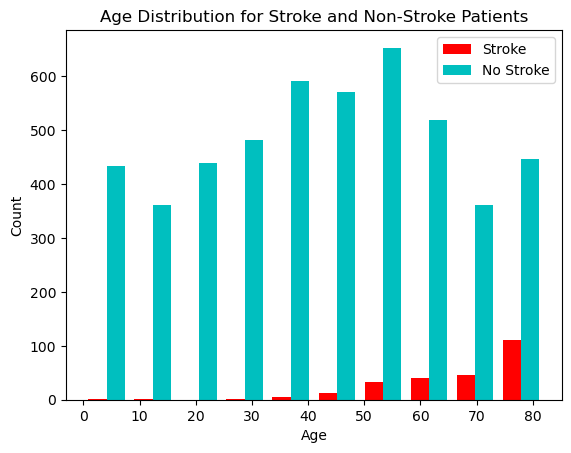

In [34]:
#Visualition of age with and without stroke
plt.hist([stroke_df['age'], No_stroke_df['age']], bins=10, color=['r', 'c'])
plt.legend(('Stroke', 'No Stroke')) 
plt.xlabel('Age') 
plt.ylabel('Count') 
plt.title('Age Distribution for Stroke and Non-Stroke Patients') 
plt.show()

<AxesSubplot:ylabel='hypertension'>

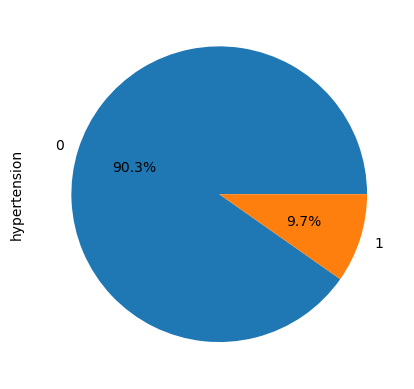

In [35]:
#Visualisation of hypertension
df['hypertension'].value_counts().plot.pie(autopct = '%1.1f%%')

<AxesSubplot:ylabel='hypertension'>

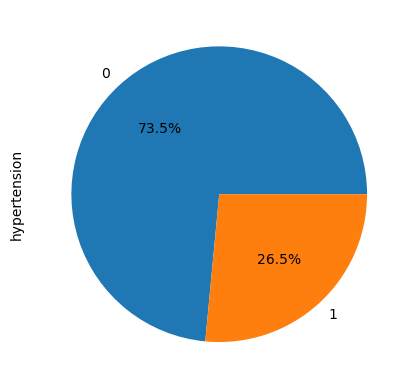

In [36]:
#Visualisation of hypertension with stroke
stroke_df['hypertension'].value_counts().plot.pie(autopct = '%1.1f%%')

<AxesSubplot:ylabel='hypertension'>

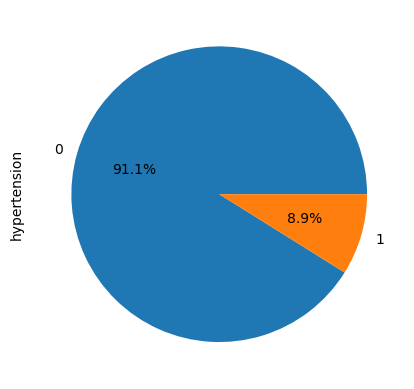

In [37]:
#Visualisation of hypertension without stroke
No_stroke_df['hypertension'].value_counts().plot.pie(autopct = '%1.1f%%')

<AxesSubplot:ylabel='heart_disease'>

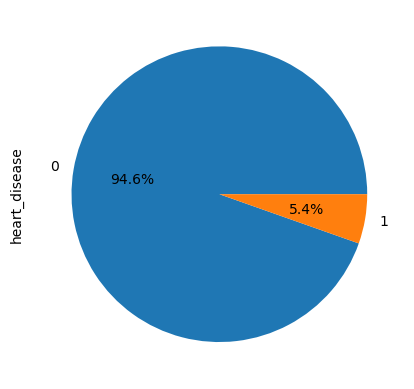

In [38]:
#Visualisation of heart_disease
df['heart_disease'].value_counts().plot.pie(autopct = '%1.1f%%')

<AxesSubplot:ylabel='heart_disease'>

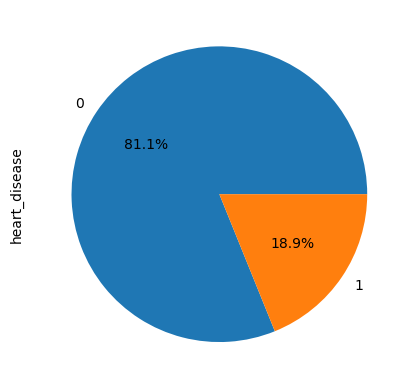

In [39]:
#Visualisation of heart_disease with stroke
stroke_df['heart_disease'].value_counts().plot.pie(autopct = '%1.1f%%')

<AxesSubplot:ylabel='heart_disease'>

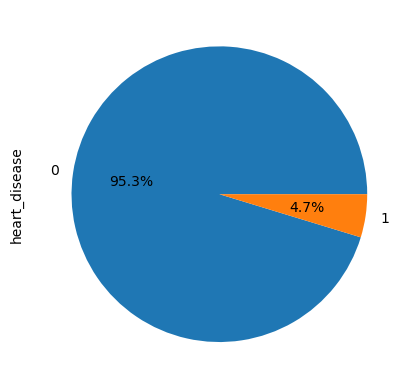

In [40]:
#Visualisation of heart_disease without stroke
No_stroke_df['heart_disease'].value_counts().plot.pie(autopct = '%1.1f%%')

<AxesSubplot:ylabel='ever_married'>

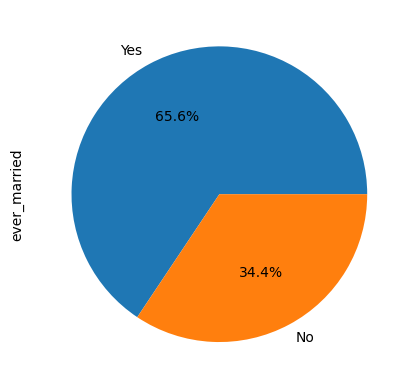

In [41]:
#Visualisation of ever_married
df['ever_married'].value_counts().plot.pie(autopct = '%1.1f%%')

<AxesSubplot:ylabel='ever_married'>

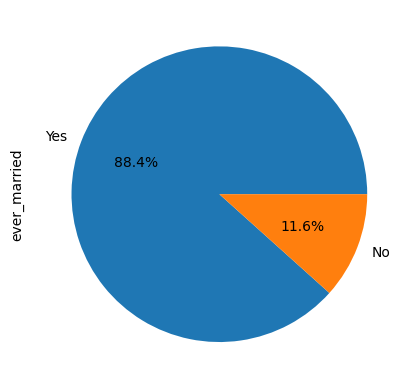

In [42]:
#Visualisation of ever_married with stroke
stroke_df['ever_married'].value_counts().plot.pie(autopct = '%1.1f%%')

<AxesSubplot:ylabel='ever_married'>

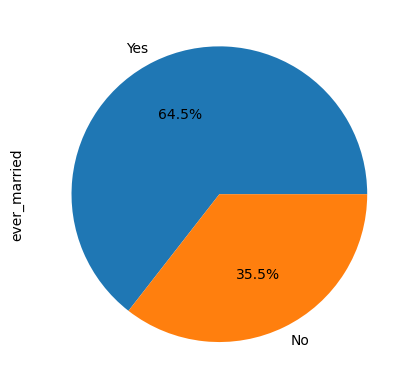

In [43]:
#Visualisation of ever_married without stroke
No_stroke_df['ever_married'].value_counts().plot.pie(autopct = '%1.1f%%')

<AxesSubplot:ylabel='work_type'>

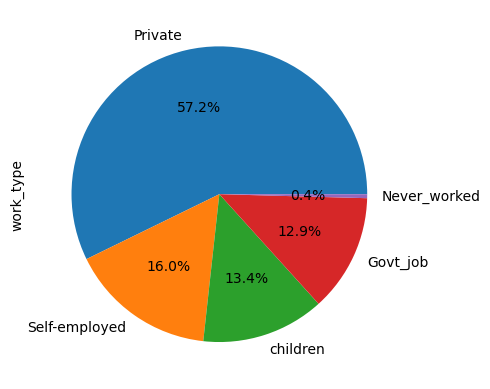

In [44]:
#Visualisation of work_type
df['work_type'].value_counts().plot.pie(autopct = '%1.1f%%')

<AxesSubplot:ylabel='work_type'>

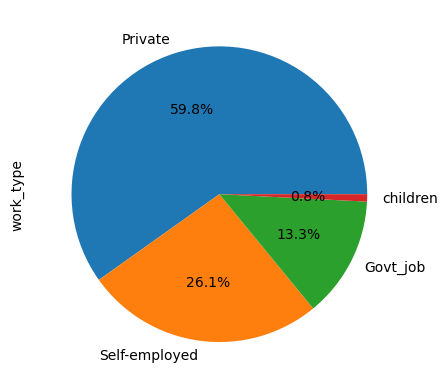

In [45]:
#Visualisation of work_type with stroke
stroke_df['work_type'].value_counts().plot.pie(autopct = '%1.1f%%')

<AxesSubplot:ylabel='work_type'>

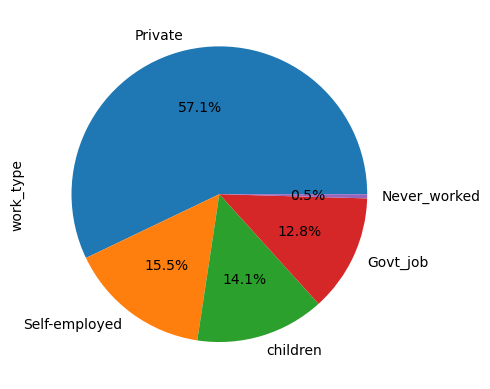

In [46]:
#Visualisation of work_type without stroke 
No_stroke_df['work_type'].value_counts().plot.pie(autopct = '%1.1f%%')

<AxesSubplot:ylabel='Residence_type'>

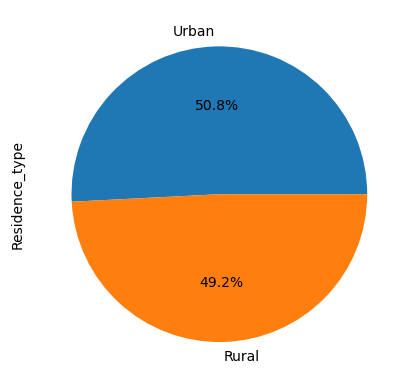

In [47]:
#Visualisation of Residence_type
df['Residence_type'].value_counts().plot.pie(autopct = '%1.1f%%')

<AxesSubplot:ylabel='Residence_type'>

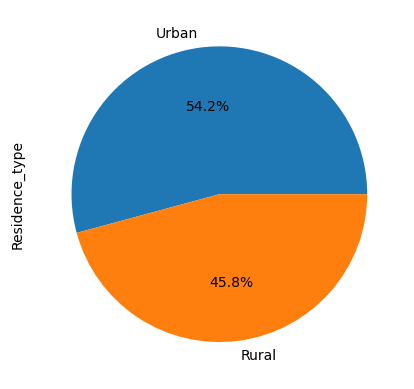

In [48]:
#Visualisation of Residence_type with stroke
stroke_df['Residence_type'].value_counts().plot.pie(autopct = '%1.1f%%')

<AxesSubplot:ylabel='Residence_type'>

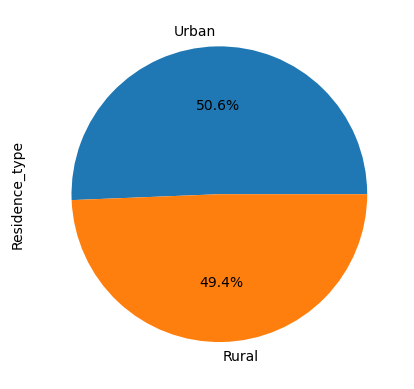

In [49]:
#Visualisation of Residence_type without stroke
No_stroke_df['Residence_type'].value_counts().plot.pie(autopct = '%1.1f%%')

In [50]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.47,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


[Text(0.5, 0, 'Average Glucose Level'), Text(0, 0.5, 'Frequency')]

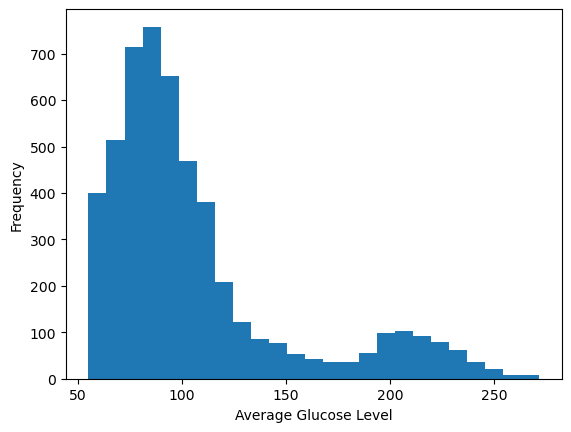

In [51]:
#Visualisation of avg_glucose_level
ax = plt.axes()
ax.hist(df['avg_glucose_level'], bins = 25)
ax.set(xlabel = 'Average Glucose Level', ylabel = 'Frequency')

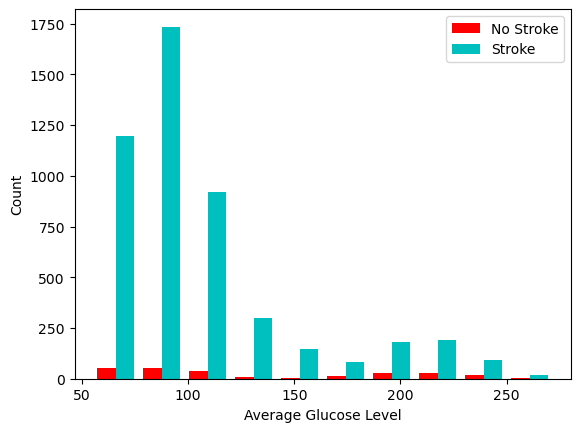

In [52]:
plt.hist([stroke_df['avg_glucose_level'], No_stroke_df['avg_glucose_level']], bins = 10, color = ['r', 'c'])
plt.legend(('No Stroke', 'Stroke'))
plt.xlabel('Average Glucose Level')
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

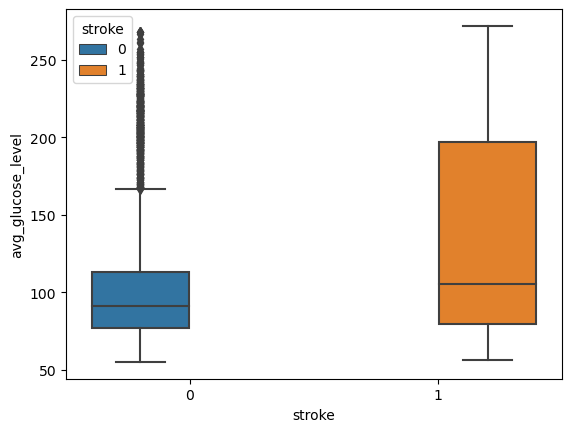

In [53]:
sns.boxplot(x = 'stroke', y = 'avg_glucose_level', data = df, hue = 'stroke')

[Text(0.5, 0, 'bmi'), Text(0, 0.5, 'Frequency')]

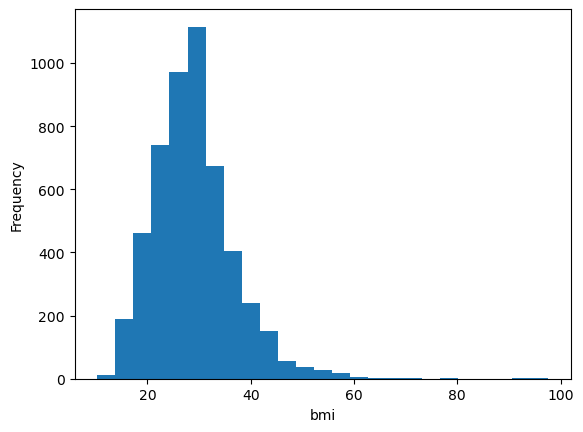

In [54]:
# Visualisation of bmi
ax = plt.axes()
ax.hist(df['bmi'], bins = 25)
ax.set(xlabel = 'bmi', ylabel = 'Frequency')

Text(0, 0.5, 'frequency')

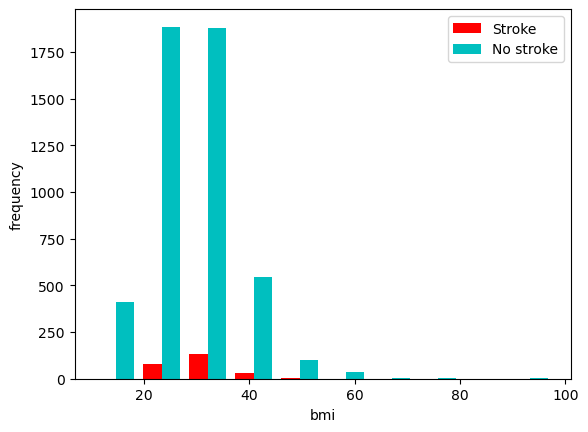

In [55]:
plt.hist([stroke_df['bmi'], No_stroke_df['bmi']], bins = 10, color = ['r', 'c'])
plt.legend(('Stroke', 'No stroke'))
plt.xlabel('bmi')
plt.ylabel('frequency')

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

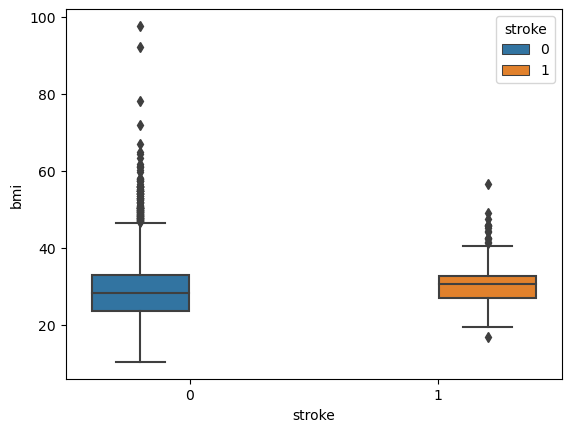

In [56]:
sns.boxplot(x = 'stroke', y = 'bmi', data = df, hue = 'stroke')

<AxesSubplot:ylabel='smoking_status'>

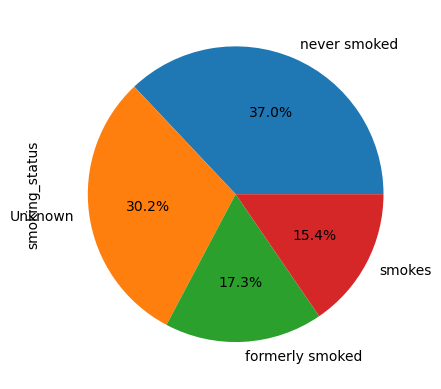

In [57]:
#Visualisation of smoking_status
df['smoking_status'].value_counts().plot.pie(autopct = '%1.1f%%')

<AxesSubplot:ylabel='smoking_status'>

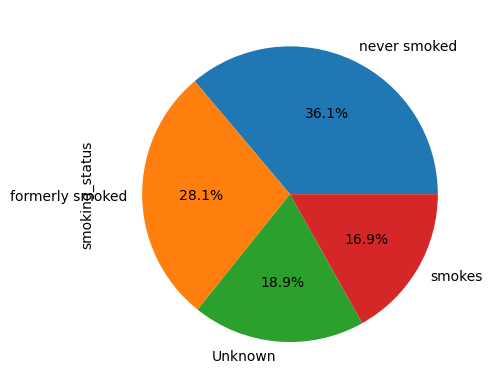

In [58]:
stroke_df['smoking_status'].value_counts().plot.pie(autopct = '%1.1f%%')

<AxesSubplot:ylabel='smoking_status'>

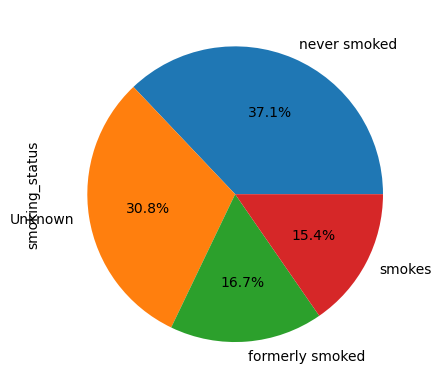

In [59]:
No_stroke_df['smoking_status'].value_counts().plot.pie(autopct = '%1.1f%%')

# Split data to train data and test data

In [60]:
X = df.copy()

In [61]:
y = X['stroke']

In [62]:
X = X[['bmi']]

In [63]:
X.columns

Index(['bmi'], dtype='object')

In [64]:
from sklearn import tree

In [65]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.33, random_state = 42)

In [67]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [68]:
clf.score(X, y)

0.9596789978469368

In [69]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [70]:
clf.score(X_train, y_train)

0.9628980426526439

In [71]:
clf.score(X_test, y_test)

0.9519572953736655

In [72]:
y_pred = clf.predict(X_test)